In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, re, glob, cv2, numpy as np
path = os.path.abspath('soil.ipynb')

In [ ]:
path = re.sub('[a-zA-Z\s._]+$', '', path)
dirs = os.listdir('/content/drive/MyDrive/dataset/datatanah/')
label=0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs:
  count=0
  for pic in glob.glob('/content/drive/MyDrive/dataset/datatanah/'+i+'/*'):
    im = cv2.imread(pic)
    im = cv2.resize(im,(256,256))
    im = np.array(im)
    count = count+1
    X.append(im)
    y.append(label)
    if(count <= 10):
      im_arr.append({str(i):im})
  print('Jumlah '+str(i)+' : '+str(count))
  label = label+1
  lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah subur : 250
Jumlah tidaksubur : 250


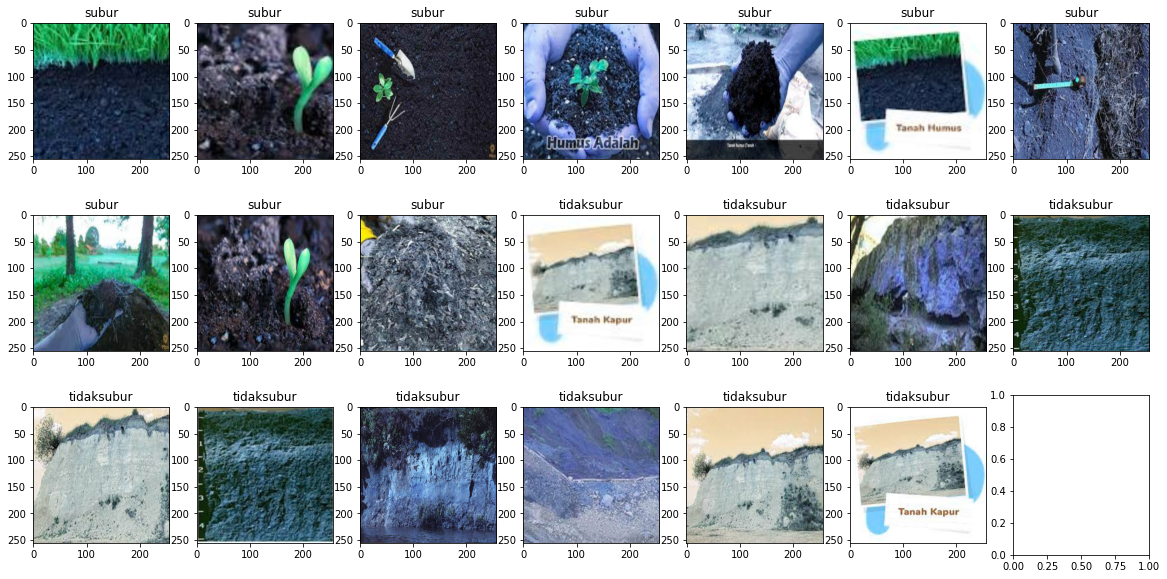

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 7, figsize=(20,10))
cnt = 0
row = 0
col = 0
for i in im_arr:
  for key, value in i.items():
    if(cnt==7):
      row = row + 1
      col = 0
      cnt = 0
    axs[row, col]. imshow(value)
    axs[row, col].set_title(key)
    cnt = cnt+1
    col = col+1
plt.show()

In [ ]:
!pip install keras

In [ ]:
!pip install utils

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [ ]:
from keras.optimizers import SGD
epochs = 25
lrate=0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
training_hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuraccy: %.2f%%' % (scores[1]*100))

Epoch 1/25
13/13 [==============================] - 31s 2s/step - loss: 0.0750 - accuracy: 0.9625 - val_loss: 0.6526 - val_accuracy: 0.7600
Epoch 2/25
13/13 [==============================] - 31s 2s/step - loss: 0.0650 - accuracy: 0.9700 - val_loss: 0.6908 - val_accuracy: 0.7900
Epoch 3/25
13/13 [==============================] - 31s 2s/step - loss: 0.0699 - accuracy: 0.9650 - val_loss: 0.7362 - val_accuracy: 0.7500
Epoch 4/25
13/13 [==============================] - 31s 2s/step - loss: 0.0598 - accuracy: 0.9700 - val_loss: 0.7411 - val_accuracy: 0.8000
Epoch 5/25
13/13 [==============================] - 31s 2s/step - loss: 0.0869 - accuracy: 0.9650 - val_loss: 0.7042 - val_accuracy: 0.8000
Epoch 6/25
13/13 [==============================] - 31s 2s/step - loss: 0.0626 - accuracy: 0.9750 - val_loss: 0.6690 - val_accuracy: 0.7700
Epoch 7/25
13/13 [==============================] - 31s 2s/step - loss: 0.0595 - accuracy: 0.9750 - val_loss: 0.7434 - val_accuracy: 0.7700
Epoch 8/25
13/13 [==

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, target_names=['subur', 'tidaksubur']))

              precision    recall  f1-score   support

       subur       0.82      0.70      0.75        46
  tidaksubur       0.77      0.87      0.82        54

    accuracy                           0.79       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.79      0.79      0.79       100



In [ ]:
y_pred = model.predict_classes(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

0.79


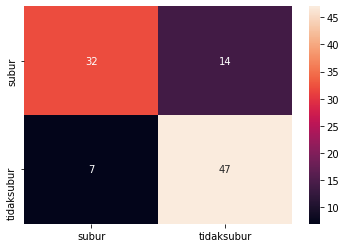

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
print(accuracy_score(y_test_class, y_pred))

cm = confusion_matrix(y_test_class, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['subur', 'tidaksubur'], yticklabels=['subur', 'tidaksubur'])

In [ ]:
def render_training(training_hist):
  loss = training_hist.history['loss']
  val_loss = training_hist.history['val_loss']

  accuracy = training_hist.history['accuracy']
  val_accuracy = training_hist.history['val_accuracy']

  plt.figure(figsize=(14,4))

  plt.subplot(1,2,1)
  plt.title('Plot Loss Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(loss, label='Training set')
  plt.legend()
  plt.grid(linestyle='--', linewidth=1, alpha=0.5)

  plt.subplot(1,2,2)
  plt.title('Plot Accuracy Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(accuracy, label='Training set')
  plt.plot(val_accuracy, label='Test set')
  plt.legend()
  plt.grid(linestyle='--', linewidth=1, alpha=0.5)

  plt.show()

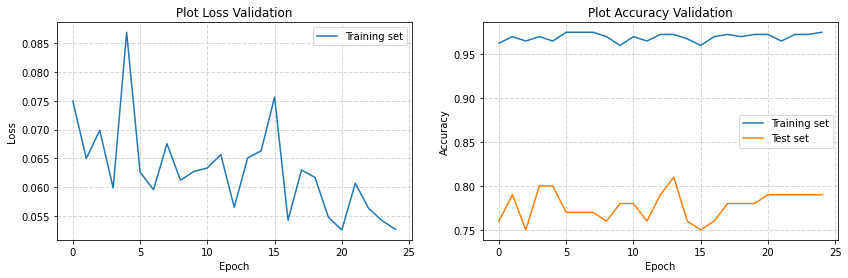

In [ ]:
render_training(training_hist)

In [ ]:
import numpy as np
lm = np.mean(training_hist.history['val_accuracy'])
lm

0.777999997138977

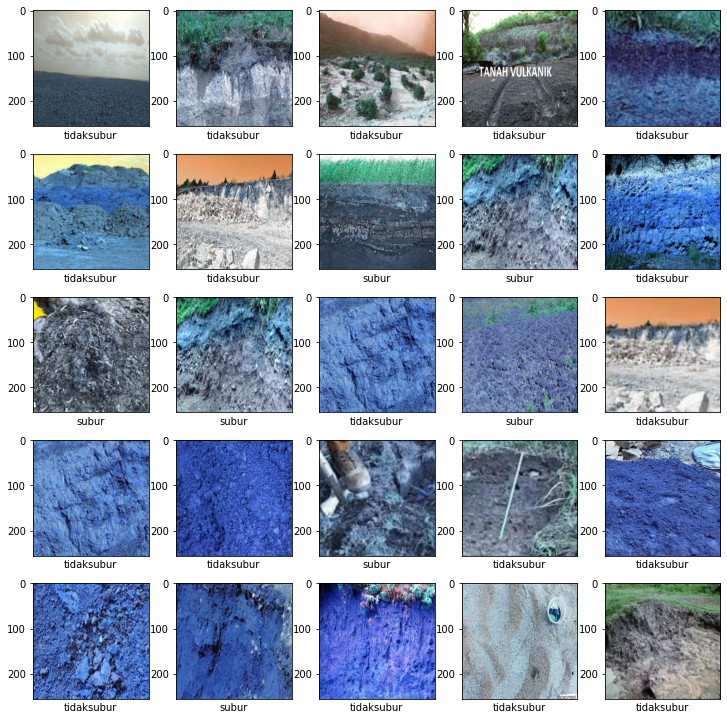

In [ ]:
class_name = ['subur', 'tidaksubur']
y_pred = model.predict(X_test)
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1).set_xticks([])
  plt.imshow(X_test[i])
  prediksi = np.argmax(y_pred[i])
  plt.xlabel(class_name[prediksi])
plt.tight_layout(pad=0.4)
plt.show()

In [ ]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "soil_project"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
  os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path, include_optimizer=False)

Saving Model At model/soil_project/model.h5...


In [ ]:
import tkinter

In [ ]:
import tkinter
import tkinter as tk
import PIL
from tkinter import *
from tkinter.filedialog import askopenfilename
from PIL import Image
from PIL import ImageTk
from tkinter import filedialog
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing import image
import keras.models

# create a class name of dir
class_name = ['subur', 'tidaksubur']

# form app
mainform = tk.Tk()
mainform.title('Soil Fertility Detection')
mainform.geometry('1000x700')

# size of label form
lbll = tkinter.Label(
    mainform, text='Soil Fertility Detection', font=('Arial', 20, 'bold'))
lbll.pack(padx=120, pady=10)

# create a button function
def buttonclick():
    import numpy as np
    from matplotlib import pyplot as plt
    from keras.prerpocessing import image
    import keras.models

    pict = askopenfilename(filetypes=(('Image file', '*.jpg'), ('JPEG file', '*.jpeg'), ('PNG file', '*.png'), ('All file', '*.*')))
    test_image = umage.load_img(pict, target_size=(256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)

#load model.h5
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

#save the image predict into classes
images = np.vstack([test_image])
classes = model.predict_classes(images, batch_size=10)

if classes == 1:
    prediction='TIDAK SUBUR'
    lblhasil.configure(text=prediction, fg='red')
else:
    prediction='SUBUR'
    lblhasil.configure(text=prediction, fg='green')
    lblgambar.configure(text='Gambar pada '+pict+'')
img_default = 'img_default.png'
images = image.open(pict)
images = images.resize((600,400), Image.ANTIALIAS)
img = ImageTk.PhotoImage(images)
c = canvas_widget.create_image(300,200, image=img)
c.pack()

def clear():
    lblgambar.configure(text='')
    lblhasil.configure(text='')
    canvas.itemconfig(c, image=img_default)

#form show
lbl = tkinter.Label(mainform, text='Select Image', font=('Arial', 14))

klasifikasi = tkinter.Label(text='Prediction', font=('Arial', 16))
klasifikasi.place(x=430, y=530)

lblhasil = tkinter.Label(mainform, text='', bg='white', fg='green', font=('Arial', 18))
lblhasil.pack()
lblhasil.place(x=450, y=600)
lblgambar = tkinter.Label(mainform, text='', font=('Arial', 10))
lblgambar.place(x=180, y=470)

process = tkinter.Button(mainform, command= buttonclick, bg='green', fg='white', text='Select & Process', font=('Arial', 14))
clean = tkinter.Button(mainform, command = clear, bd='red', fg='white', font=('Arial', 14))
clean.pack()
clean.place(x=750, y=590)


canvas_widget = Canvas(bg='white', widht=600, height=400)
canvas_widget.pack()
lbl.pack()
process.pack()

mainform.mainloop()

TclError: ignored

Saving image18 (2).jpeg to image18 (2).jpeg
image18 (2).jpeg
[1]
Tanah Tidak Subur


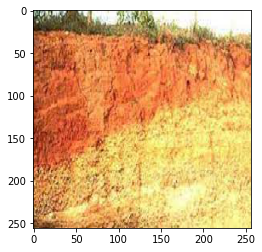

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  #prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(256,256))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = np.argmax(model.predict(images), axis=-1)

  print(fn)
  if classes == 0:
    print(classes)
    print('Tanah Subur')
  else:
    print(classes)
    print('Tanah Tidak Subur')

In [ ]:
print(classes)

[1]
